In [20]:
# Import Important Libraries
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [21]:
# Dataset paths 
train_dir = r"C:\Users\HP\Downloads\imagenet-subset-10\imagenet subset\train"

In [22]:
val_dir = r"C:\Users\HP\Downloads\imagenet-subset-10\imagenet subset\val"

In [23]:
# Image parameters
img_size = (224, 224)
batch_size = 32

In [24]:
# Image augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True)


train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical')


val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical')


Found 9469 images belonging to 10 classes.
Found 3925 images belonging to 10 classes.


In [25]:
#  Check Classes
print("Class Indices:", train_generator.class_indices)
print("Number of Classes:", len(train_generator.class_indices))


Class Indices: {'Church': 0, 'Dog': 1, 'Fish': 2, 'French horn': 3, 'Golf ball': 4, 'Music system': 5, 'Parachute': 6, 'Petrol pump': 7, 'Truck': 8, 'Wood cutter': 9}
Number of Classes: 10


In [26]:
# Model Architecture
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(256, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')])  



In [27]:
# Model compilation 
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])


In [28]:
# Model Summary
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 26, 26, 128)      

In [29]:
# Callbacks for better training
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

In [30]:
# Train the model
epochs = 15
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs,
    callbacks=[early_stopping, reduce_lr]
)


Epoch 1/15
296/296 [==============================] - 628s 2s/step - loss: 1.9663 - accuracy: 0.2917 - val_loss: 1.5803 - val_accuracy: 0.4708 - lr: 0.0010
Epoch 2/15
296/296 [==============================] - 567s 2s/step - loss: 1.5129 - accuracy: 0.4894 - val_loss: 1.3440 - val_accuracy: 0.5503 - lr: 0.0010
Epoch 3/15
296/296 [==============================] - 479s 2s/step - loss: 1.2832 - accuracy: 0.5769 - val_loss: 1.1207 - val_accuracy: 0.6349 - lr: 0.0010
Epoch 4/15
296/296 [==============================] - 467s 2s/step - loss: 1.1327 - accuracy: 0.6312 - val_loss: 1.0438 - val_accuracy: 0.6606 - lr: 0.0010
Epoch 5/15
296/296 [==============================] - 453s 2s/step - loss: 1.0247 - accuracy: 0.6720 - val_loss: 0.9474 - val_accuracy: 0.7017 - lr: 0.0010
Epoch 6/15
296/296 [==============================] - 459s 2s/step - loss: 0.9601 - accuracy: 0.6936 - val_loss: 0.9274 - val_accuracy: 0.7037 - lr: 0.0010
Epoch 7/15
296/296 [==============================] - 448s 2s/st

In [36]:
# Model save
model.save(r"C:\Users\HP\Downloads\Image_classification")

INFO:tensorflow:Assets written to: C:\Users\HP\Downloads\Image_classification\assets


INFO:tensorflow:Assets written to: C:\Users\HP\Downloads\Image_classification\assets


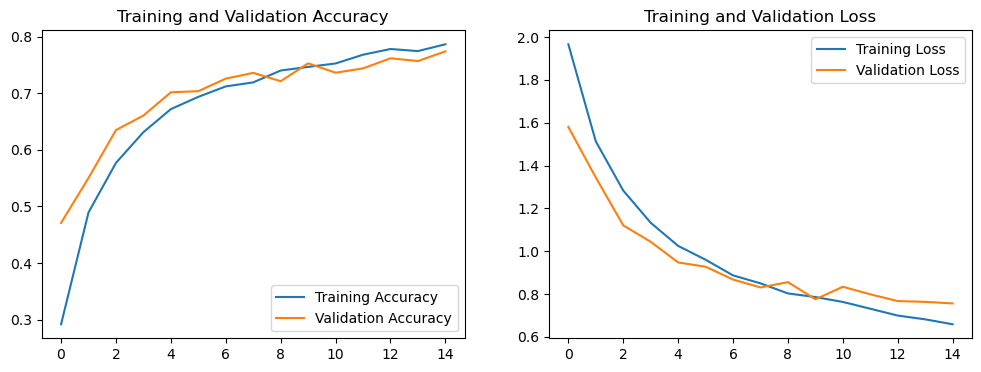

Final Training Accuracy: 0.7866
Final Validation Accuracy: 0.7740


In [37]:
# Training and validation accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Number of epochs
epochs_range = range(len(train_acc))

# Plot accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

# Print final accuracy values
print(f"Final Training Accuracy: {train_acc[-1]:.4f}")
print(f"Final Validation Accuracy: {val_acc[-1]:.4f}")


1/1 [==============================] - 0s 56ms/step


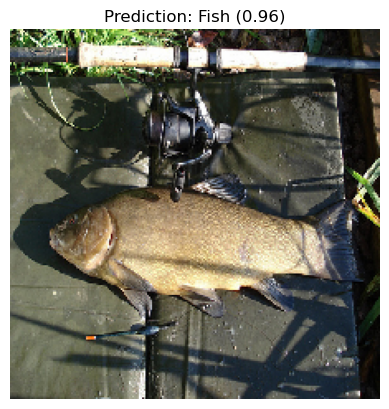

Predicted Class: Fish
Confidence Score: 0.96


In [45]:
import numpy as np

# Function to preprocess and predict image
def predict_image(model, img_path, class_labels, target_size=(224, 224)):
    
    # Load and preprocess image
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)  
    img_array = np.expand_dims(img_array, axis=0)  
    img_array /=255 

    # Prediction
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]  
    confidence = np.max(predictions)  

    # Display image and prediction
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Prediction: {class_labels[predicted_class]} ({confidence:.2f})")
    plt.show()

    return class_labels[predicted_class], confidence

# Define class labels (same order as training generator)
class_labels = list(train_generator.class_indices.keys())  

# Test with an image
img_path = r"C:\Users\HP\Downloads\imagenet-subset-10\imagenet subset\train\Fish\ILSVRC2012_val_00002138.JPEG"

# Replace with test image path
predicted_label, confidence = predict_image(model, img_path, class_labels)

print(f"Predicted Class: {predicted_label}")
print(f"Confidence Score: {confidence:.2f}")
